## 数据探索与可视化

### 实验目标
- 学习并掌握如何使用Python进行数据探索与可视化。
- 理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
- 使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
- 利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

### 实验要求

1. 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
2. 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。
使用describe()方法生成数据的描述性统计信息。
3. 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
4. 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
5. 使用Matplotlib绘制图表
    - 绘制条形图：展示label列的类别分布。
    - 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
    - 绘制直方图：展示log_public_repos的对数变换后的数据分布。
    - 绘制散点图：展示public_repos与followers之间的关系。
    - 绘制散点矩阵：展示多个数值型特征之间的成对关系。
6. 使用Seaborn绘制图表
    - 绘制箱线图：展示不同label类别下log_followers的分布。
    - 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    - 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    - 绘制小提琴图：展示label与log_followers之间的分布差异。
7. 使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6  2015-06

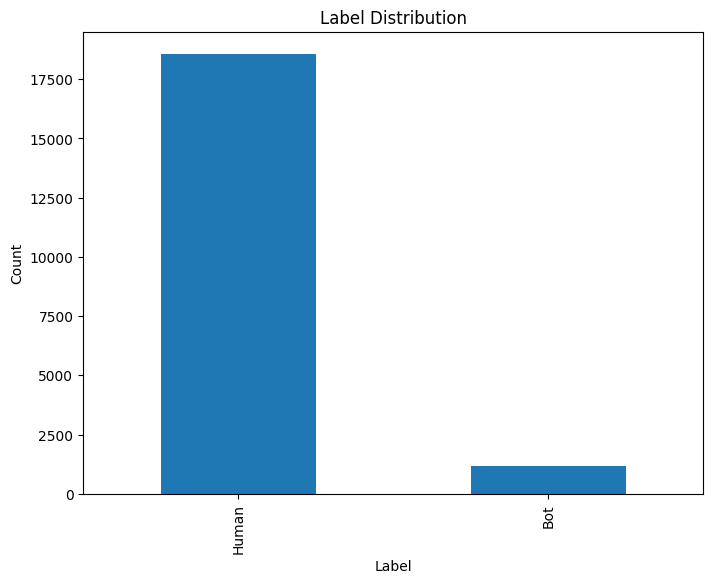

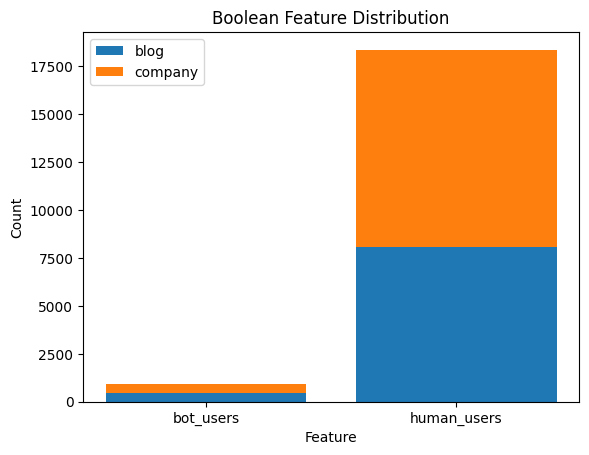

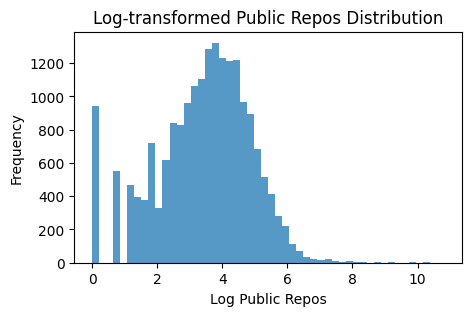

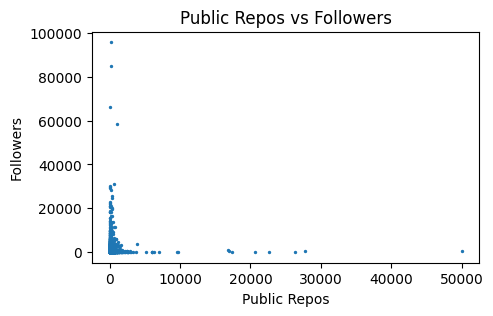

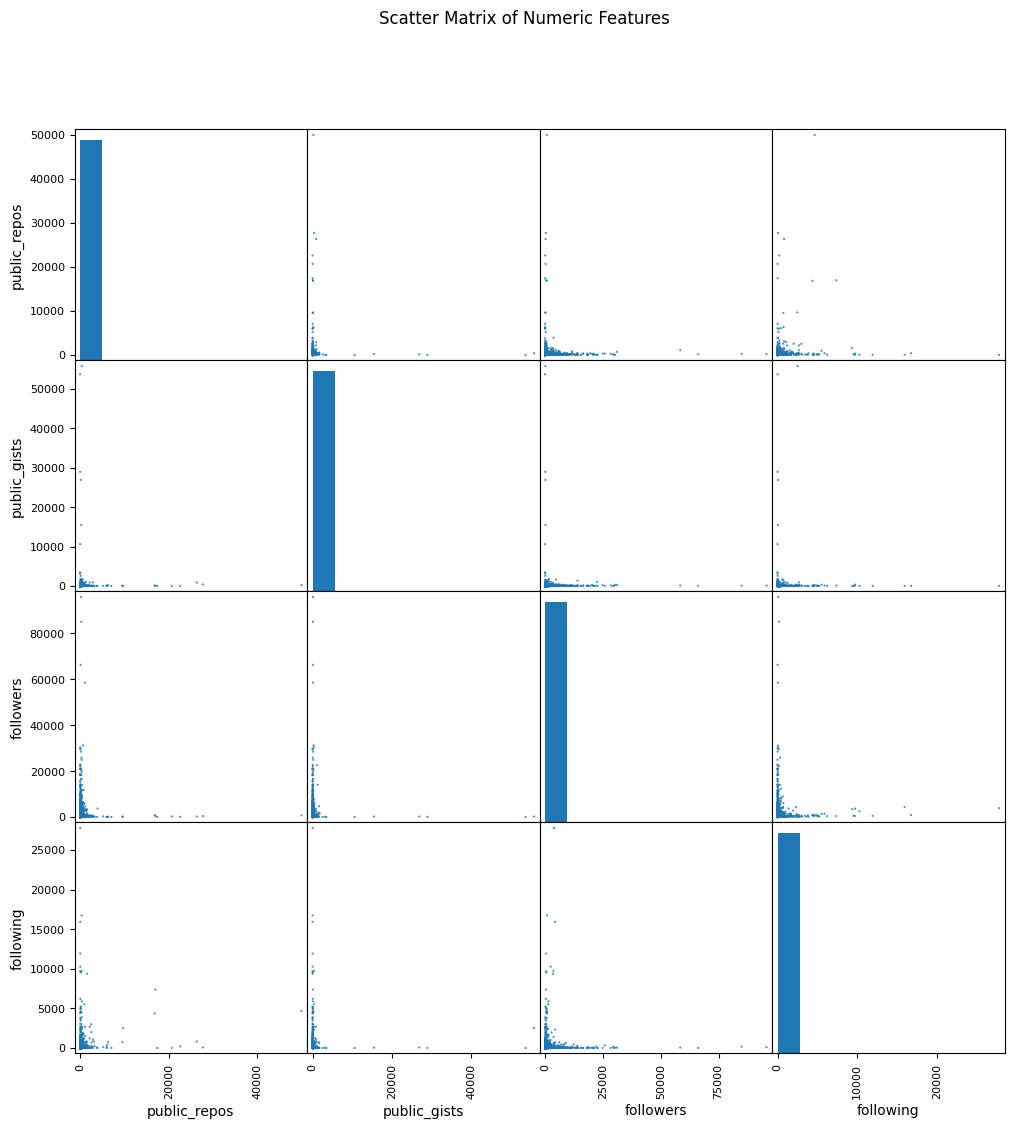

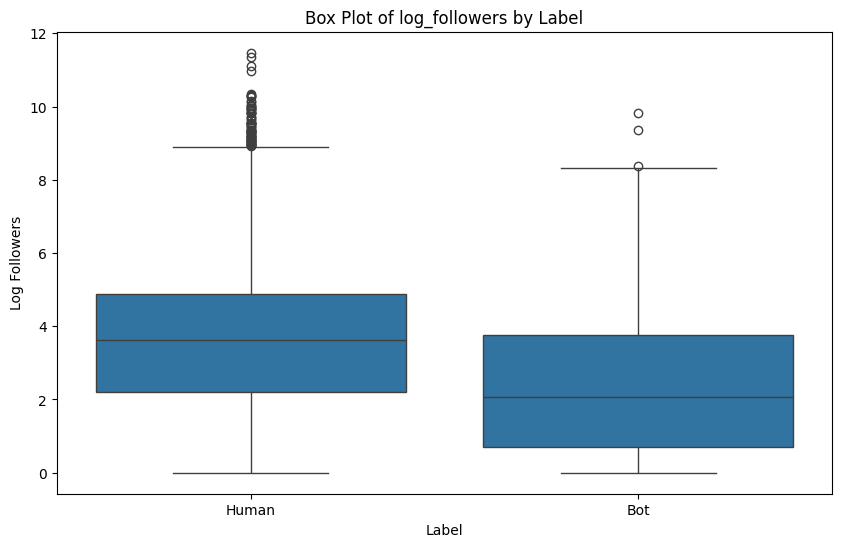

<Figure size 800x600 with 0 Axes>

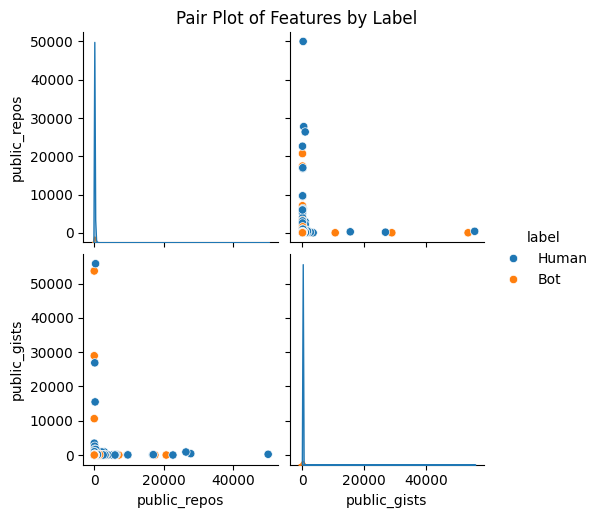

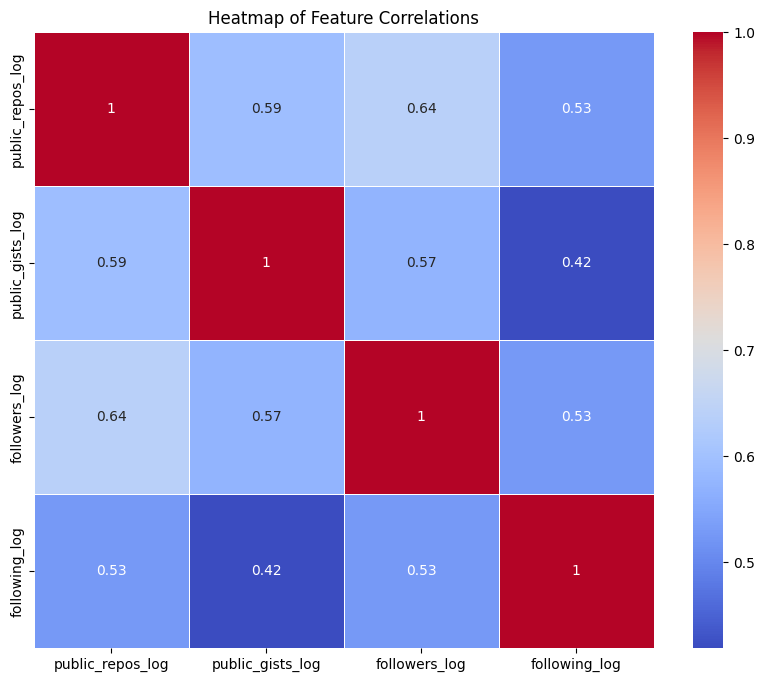

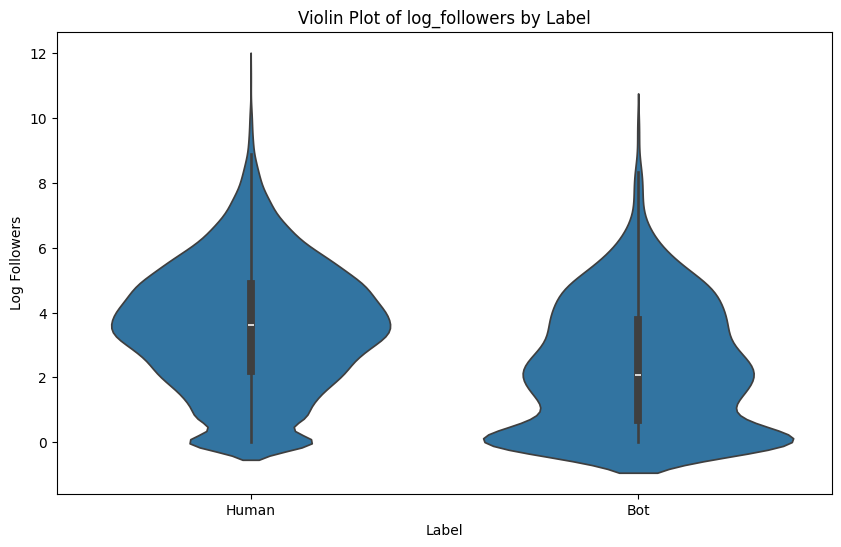

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#读取
df = pd.read_csv('github_bot_processed_data.csv')
print(df.head())
print(df.info())
print(df.describe())
#格式化
df['created_at'] = pd.to_datetime(df['created_at']).astype('int64') // 10**9
df['updated_at'] = pd.to_datetime(df['updated_at']).astype('int64') // 10**9
print(df['created_at'])
print(df['updated_at'])
#对数变换
columns_to_transform = ['public_repos', 'public_gists', 'followers', 'following']
for column in columns_to_transform:
    df[f'{column}_log'] = np.log1p(df[column])  
    print(df[f'{column}'])
    print(df[f'{column}_log'])
#条形图
label_counts = df['label'].value_counts()
bot_users = df[df['label'] == 'Bot']
human_users = df[df['label'] == 'Human']
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()
# 堆积柱状图
x = ['bot_users','human_users']
values1 = [bot_users['blog'].sum(),human_users['blog'].sum()]
values2 = [bot_users['company'].sum(),human_users['company'].sum()]
fig,ax = plt.subplots()
ax.bar(x,values1,label='blog')
ax.bar(x,values2,bottom = values1,label='company')
ax.legend()
plt.title('Boolean Feature Distribution')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()
#直方图
plt.figure(figsize=(5, 3))
plt.hist(df['public_repos_log'], bins=50, alpha=0.75)
plt.title('Log-transformed Public Repos Distribution')
plt.xlabel('Log Public Repos')
plt.ylabel('Frequency')
plt.show()
# 绘制散点图
plt.figure(figsize=(5, 3))
plt.scatter(df['public_repos'], df['followers'], s = 2)
plt.title('Public Repos vs Followers')
plt.xlabel('Public Repos')
plt.ylabel('Followers')
plt.show()
# 绘制散点矩阵
numeric_features = ['public_repos', 'public_gists', 'followers', 'following']
from pandas.plotting import scatter_matrix
scatter_matrix(df[numeric_features], figsize=(12, 12), s = 10,alpha=0.8)
plt.suptitle('Scatter Matrix of Numeric Features')
plt.show()
#箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='followers_log', data=df)
plt.title('Box Plot of log_followers by Label')
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.show()
#成对图
features = ['public_repos', 'public_gists']
pairplot_data = df[features + ['label']]
plt.figure(figsize=(8, 6))
sns.pairplot(pairplot_data, hue='label', diag_kind='kde')
plt.suptitle('Pair Plot of Features by Label', y=1.02)
plt.show()
#热图
features = ['public_repos_log', 'public_gists_log','followers_log','following_log']
pairplot_data = df[features]
correlation_matrix = pairplot_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()
#小提琴图
plt.figure(figsize=(10, 6))
sns.violinplot(x='label', y='followers_log', data=df)
plt.title('Violin Plot of log_followers by Label')
plt.xlabel('Label')
plt.ylabel('Log Followers')
plt.show()
#数据分析报告
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title='GitHub Bot Data Report')
profile.to_file("github_bot_data_report.html")

